In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Simple Decision Tree

In [2]:
pima=pd.read_csv('diabetes.csv')
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
features=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X=pima[features]
Y=pima['label']

In [4]:
#split data into test and train(75%)
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [5]:
#create an empty model
DT=DecisionTreeClassifier()
#fit it to our data
DT.fit(x_train,y_train)
#predict class labels with the test data
y_pred=DT.predict(x_test)

Parameters of DT:

- Critereon: By default is Gini impurity, but you could also choose entropy for information gain
- splitter: default is best, but you could choose random for a best random split
-max depth: default is none so the nodes expand until all leaves have less than the min_sample_split
-min sample split: the minimum number of samples we should have before splitting them (by default 2)

In [6]:
#take a look at the accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.6979166666666666


In [7]:
#and other performane metrics to see if its a good classification model
from sklearn.metrics import classification_report
labels=['0','1']
target_names=['without diabetes','with diabetes']
print(classification_report(y_test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.73      0.77       130
   with diabetes       0.53      0.63      0.57        62

        accuracy                           0.70       192
       macro avg       0.67      0.68      0.67       192
    weighted avg       0.72      0.70      0.70       192



In [8]:
#first lets visualize using text representation
text_representation=tree.export_text(DT)
print(text_representation)

|--- feature_4 <= 142.50
|   |--- feature_3 <= 28.50
|   |   |--- feature_2 <= 30.90
|   |   |   |--- feature_4 <= 128.50
|   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  128.50
|   |   |   |   |--- feature_3 <= 27.50
|   |   |   |   |   |--- feature_2 <= 28.80
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  28.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  27.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  30.90
|   |   |   |--- feature_5 <= 53.00
|   |   |   |   |--- feature_2 <= 33.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  33.85
|   |   |   |   |   |--- feature_2 <= 35.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 

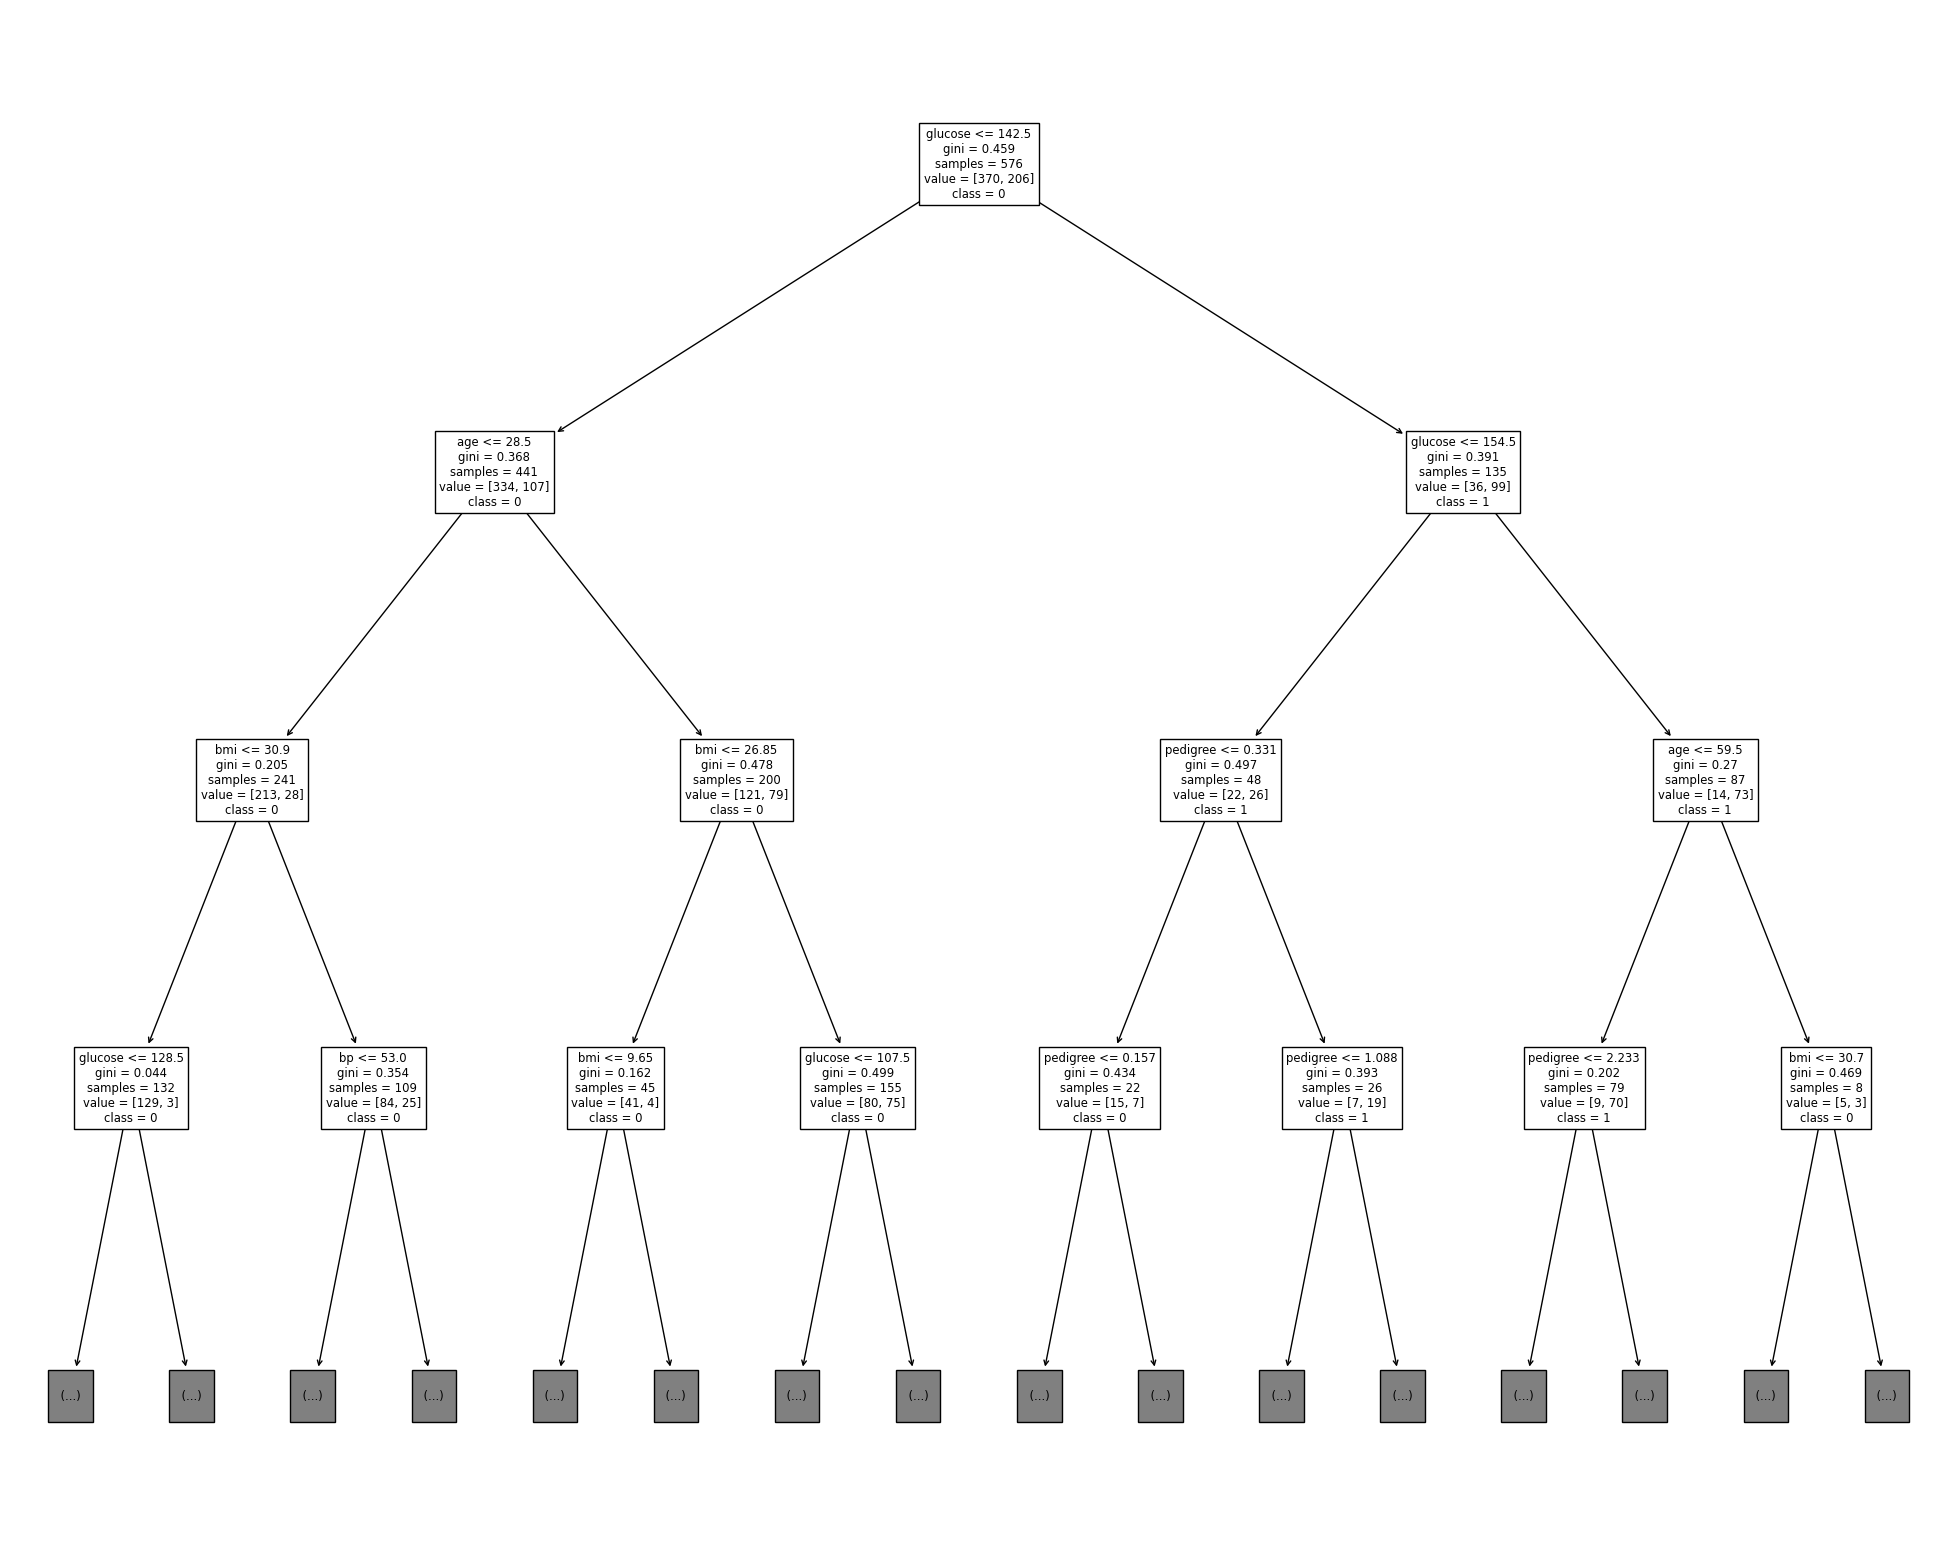

In [9]:
#now lets show the whole tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DT,max_depth=3,feature_names=features,class_names=labels)
fig.savefig("decistion_tree.png")


### XGBoost

In [10]:
pima=pd.read_csv('diabetes.csv')
features=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X=pima[features]
Y=pima['label']
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [11]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=Y)

parameters of xgboost:
- learning rate: this is the step size can be tuned in order to prevent overfitting

- max_depth: by default it is 6, but if its too big that can also lead to overfitting

- alpha and lambda: adding l1 and l2 reg to avoid overfit

- subsample: percentage of samples used per tree while training

- n_estimators: number of trees you want to build

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

#build a XGBoost regressor model
xg_reg=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                         learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
#fit the regressor model to the training set
xg_reg.fit(x_train,y_train)
#make predictions
y_pred=xg_reg.predict(x_test)
#look at the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
#root mean square between 0.2 and 0.5 is good

0.4533784974707796


<AxesSubplot: >

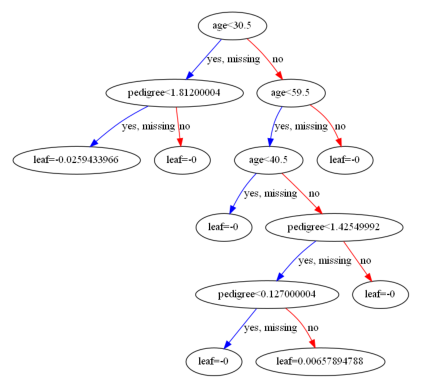

In [17]:
#Now lets visualize the first tree
xgb.plot_tree(xg_reg,num_trees=0)

### Random Forest (Bagging)

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})

features=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
label=data['species']

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
#create a random forest with 100 trees
rf=RandomForestClassifier(n_estimators=100)
#fit the model to our training data
rf.fit(x_train,y_train)
#predict labels on test set
y_pred=rf.predict(x_test)
#print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9111111111111111


In [25]:
#look atthe important features
feature_imp = pd.Series(rf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.459126
petal length (cm)    0.432009
sepal length (cm)    0.070124
sepal width (cm)     0.038742
dtype: float64

100


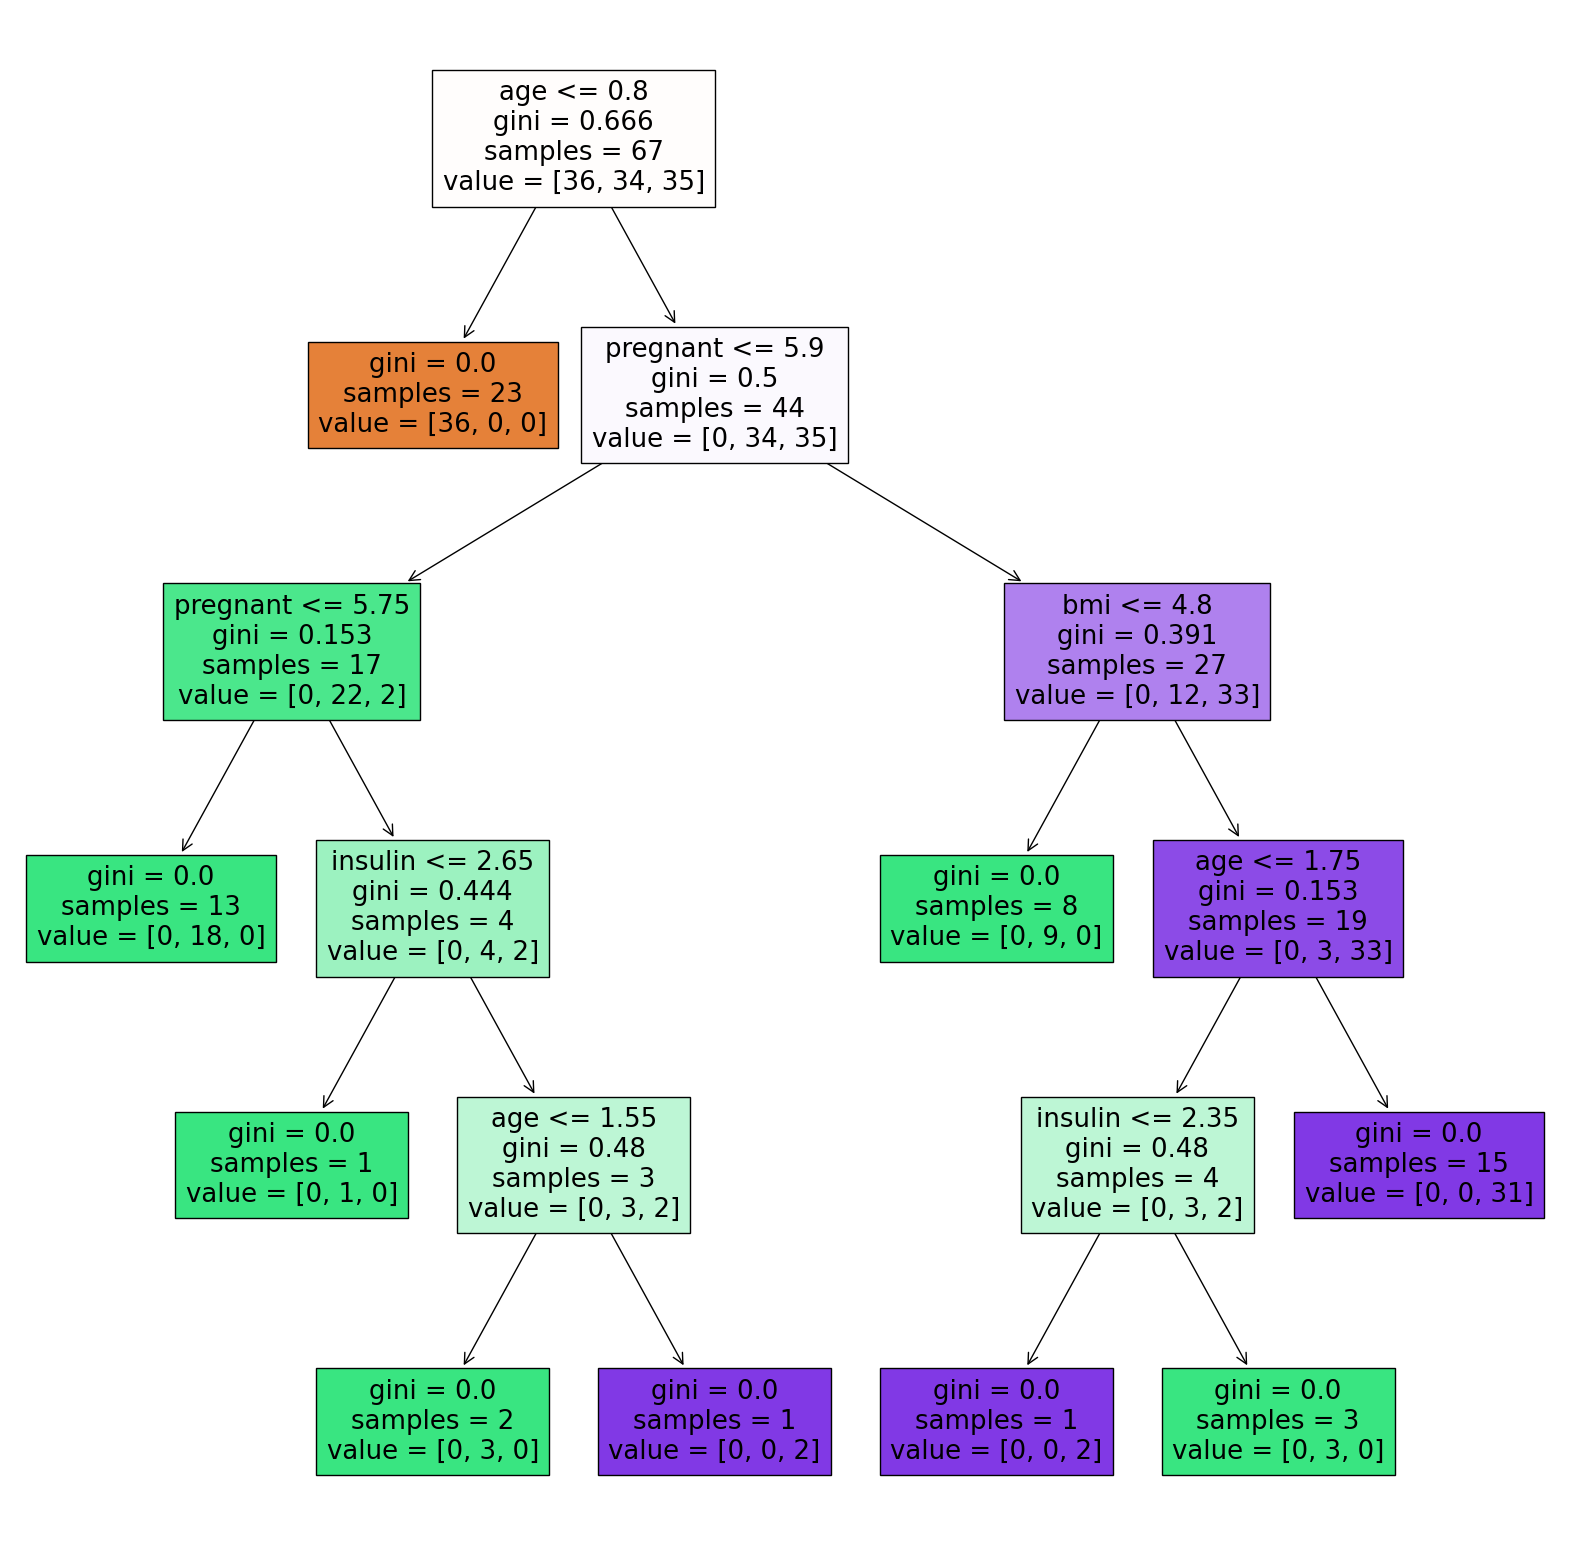

In [28]:
#lets check again how many trees we have
print(len(rf.estimators_))
#lets see the first tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)